# Create CNN for CIFAR10 dataset

1. read Toronto paper.
2. Make a subroutine to get the predictions of the top 3 probabilities for each test sample and evaluation the overall accuracy of top1 and top3 predictions.
3. read CNN overview pdf
4. download cifar10 dataset.
5. make your first CNN.  It does not need to be a big one.  It is OK to get just one or two convolution layers in your first CNN to save time.


In [2]:
from keras.optimizers import SGD, Adam
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, Conv3D, MaxPooling2D, MaxPooling3D, BatchNormalization
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from matplotlib.ticker import FormatStrFormatter
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn import tree, datasets
from scipy.io import arff
from time import time
from os.path import join
from os import system, getcwd, startfile
from timeit import default_timer as timer
import tensorflow as tf
import math
import json
import inspect
import concurrent.futures as cf  # doesn't work with sklearn
import pandas as pd
import numpy as np
import copy as copy
import statistics as stt
import seaborn as sns
import pickle
import sys
sns.set_theme()
%matplotlib inline
tf.compat.v1.Session(
    config=tf.compat.v1.ConfigProto(log_device_placement=True))


Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce GTX 1650 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5



## SHOW IMAGE

### Load CIFAR10 Data

In [3]:
import keras.datasets.cifar10 as cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


### Plot single image

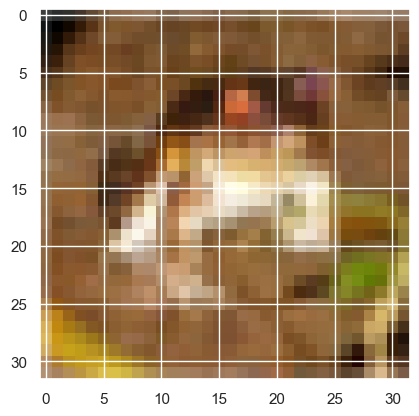

In [4]:
plt.imshow(X_train[0])
plt.show()

### Plot multiple images

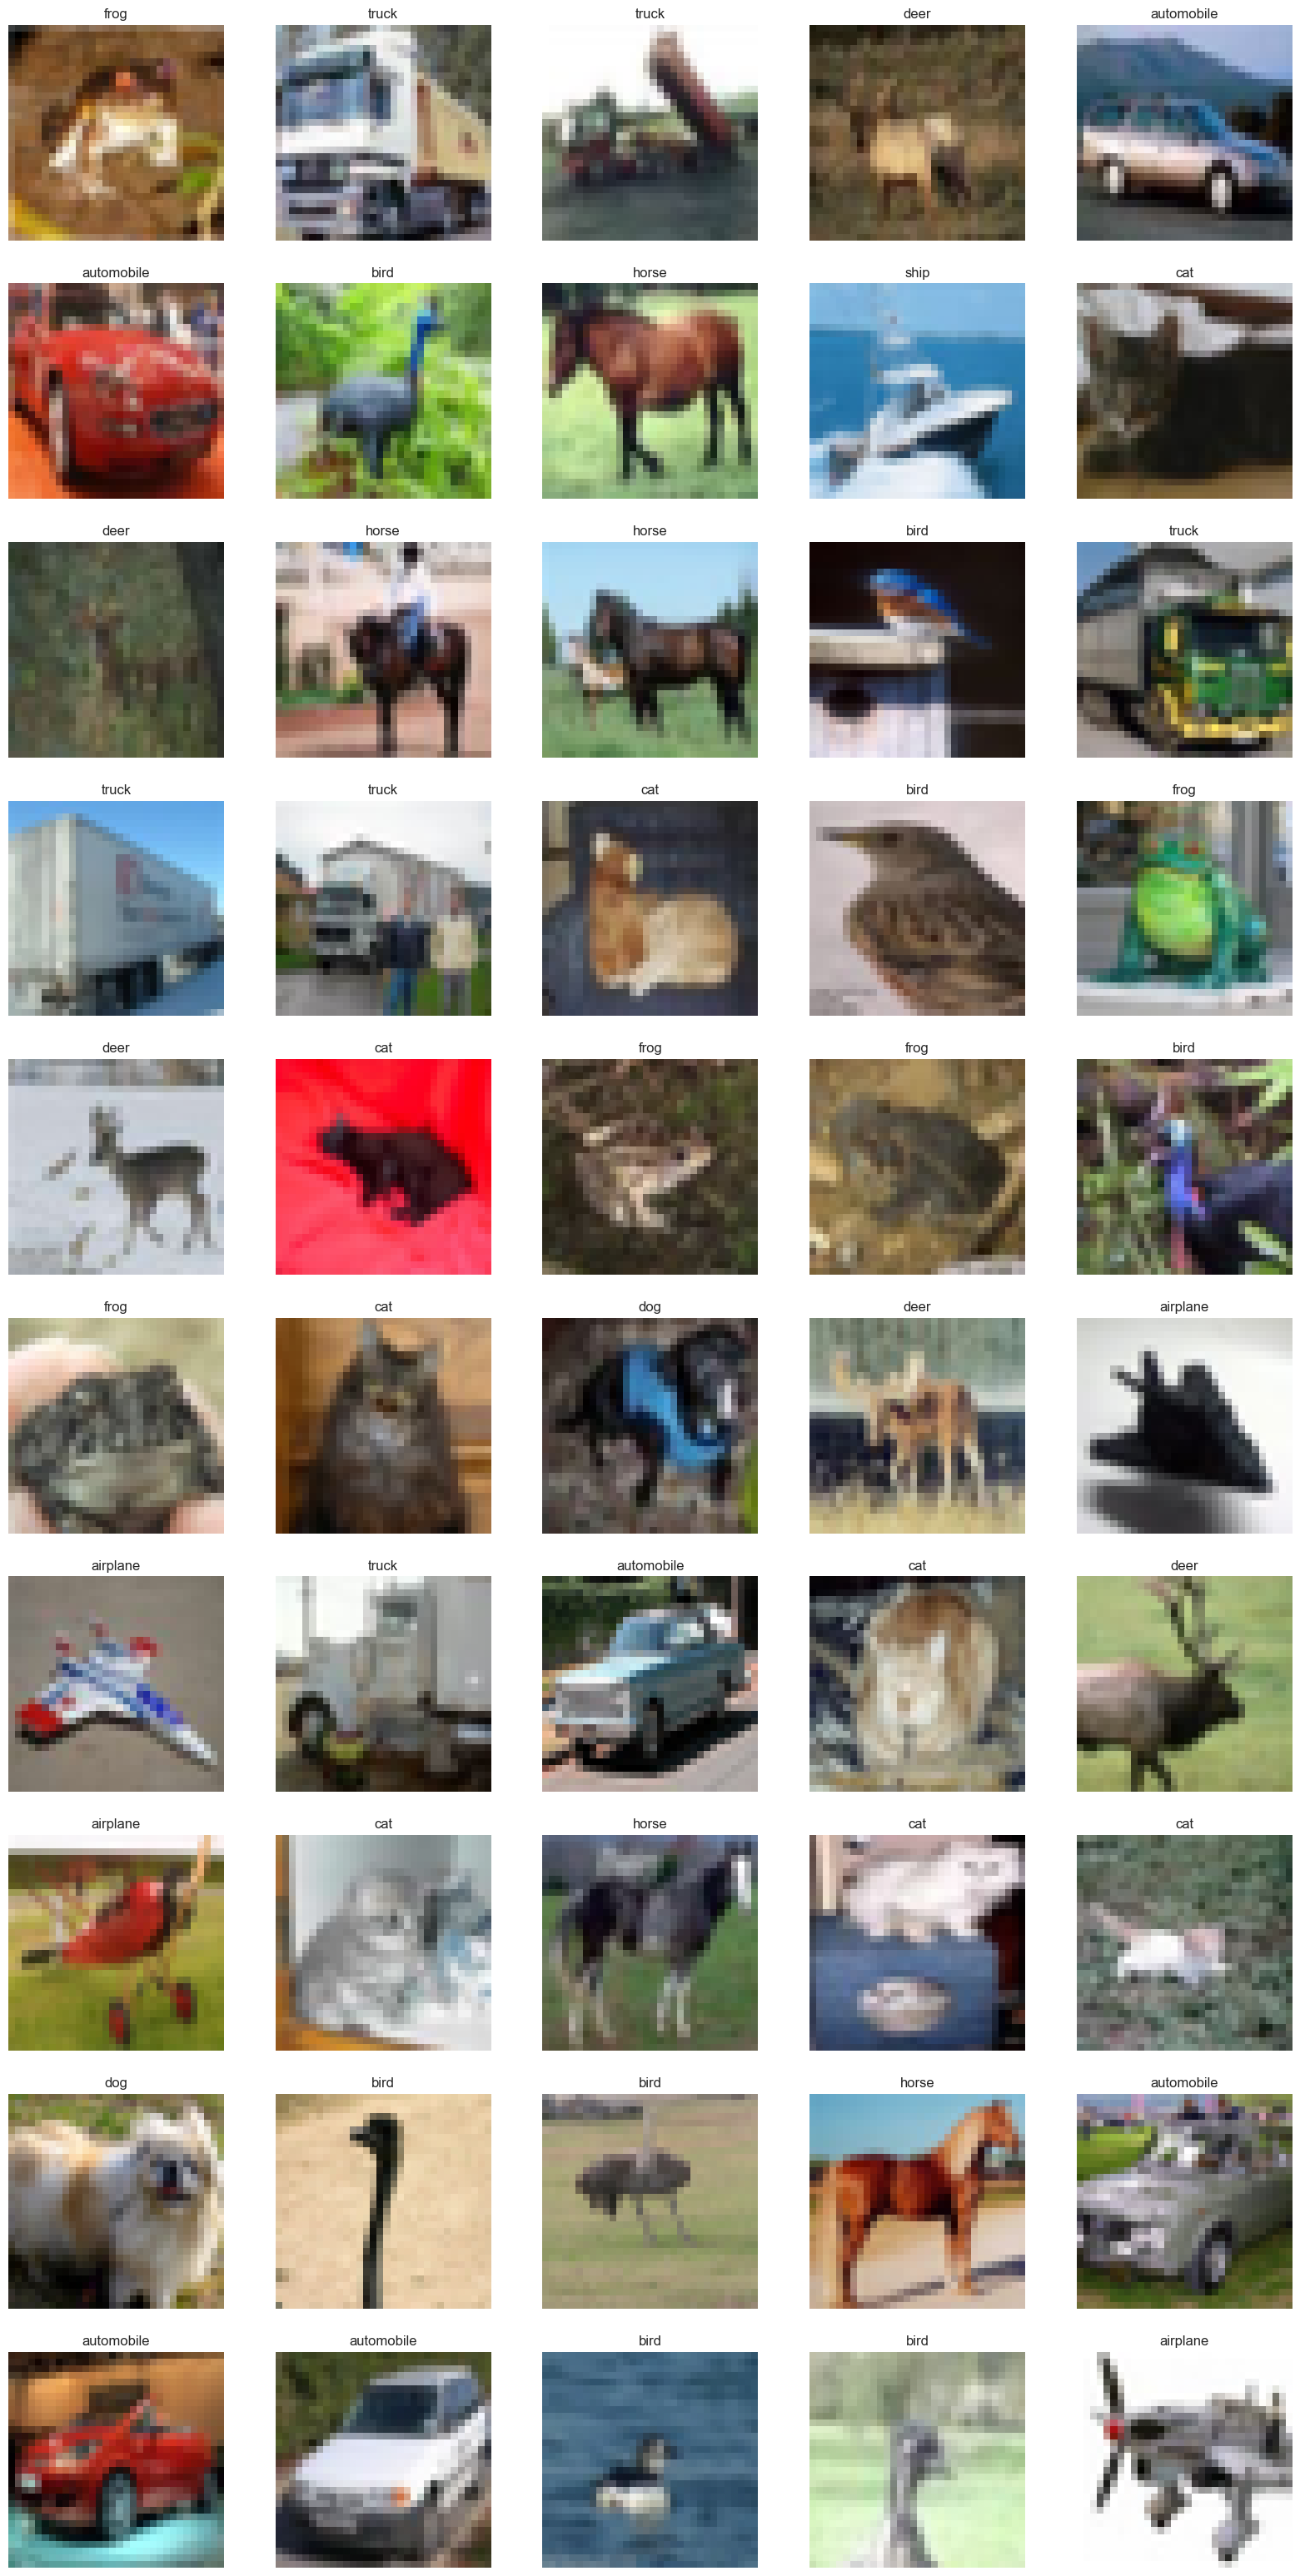

In [5]:
label = {0: "airplane", 1: "automobile", 2: "bird", 3: "cat", 4: "deer", 5: "dog", 6: "frog", 7: "horse", 8: "ship", 9: "truck"}

plt.figure(figsize=(20, 80))
for i in range(50):
    ax = plt.subplot(20, 5, i + 1)
    plt.imshow(X_train[i])
    plt.title(label[y_train[i][0]])
    plt.axis("off")
plt.show()

## ANN MODEL

In [6]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
print(X_train_flat.shape)
print(X_test_flat.shape)

(50000, 3072)
(10000, 3072)


In [7]:
y_train_flat = np_utils.to_categorical(y_train, 10)
y_test_flat = np_utils.to_categorical(y_test, 10)
print(y_train_flat.shape)
print(y_test_flat.shape)

(50000, 10)
(10000, 10)


In [8]:
features = X_train_flat.shape[1]
model = Sequential()
model.add(Dense(features, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_flat, y_train_flat, epochs=10, batch_size=32, verbose=1)
model.summary()

Epoch 1/10
1563/1563 [==============================] - 10s 5ms/step - loss: 72.7741 - accuracy: 0.1173
Epoch 2/10
1563/1563 [==============================] - 9s 5ms/step - loss: 2.3024 - accuracy: 0.0986
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 2.3038 - accuracy: 0.0988
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 2.3062 - accuracy: 0.0974
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 2.3030 - accuracy: 0.1003
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 2.3026 - accuracy: 0.0989
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0963
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 2.3032 - accuracy: 0.0977
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0984
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 2.3

## CNN

In [9]:
activation1 = 'relu'
channel1 = 100
channel2 = 200
channel3 = 400
model = Sequential()
model.add(Conv2D(channel1, (9, 9), input_shape=X_train.shape[1:], activation=activation1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(channel2, (5, 5), activation=activation1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(channel3, (3, 3), activation=activation1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(channel3, activation=activation1))
model.add(Dropout(0.5))
model.add(Dense(160, activation=activation1))
model.add(Dense(40 , activation=activation1))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [11]:
epochs = 50
model.fit(X_train, y_train_flat, epochs=epochs, batch_size=500, verbose=1)
model.summary()

Epoch 1/50
100/100 [==============================] - 6s 54ms/step - loss: 1.1702 - accuracy: 0.5838
Epoch 2/50
100/100 [==============================] - 5s 53ms/step - loss: 1.0988 - accuracy: 0.6104
Epoch 3/50
100/100 [==============================] - 5s 53ms/step - loss: 1.0523 - accuracy: 0.6282
Epoch 4/50
100/100 [==============================] - 5s 54ms/step - loss: 0.9696 - accuracy: 0.6562
Epoch 5/50
100/100 [==============================] - 5s 54ms/step - loss: 0.8989 - accuracy: 0.6796
Epoch 6/50
100/100 [==============================] - 5s 53ms/step - loss: 0.8323 - accuracy: 0.7049
Epoch 7/50
100/100 [==============================] - 5s 54ms/step - loss: 0.7625 - accuracy: 0.7299
Epoch 8/50
100/100 [==============================] - 5s 53ms/step - loss: 0.7305 - accuracy: 0.7419
Epoch 9/50
100/100 [==============================] - 5s 53ms/step - loss: 0.6579 - accuracy: 0.7658
Epoch 10/50
100/100 [==============================] - 5s 53ms/step - loss: 0.5955 - accura